<a href="https://colab.research.google.com/github/muzzymoose/Data-Science-Projects/blob/main/sunway_masters_project/data_mining/Portuguese_Bank_Marketing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Identification
----

**Problem Statement**

Financial institutions rely heavily on effective marketing campaigns to attract customers to their products. However, __traditional campaigns, such as phone calls, can be costly and time-consuming, especially when multiple attempts are required to reach potential clients__. In this context, identifying the characteristics of clients who are most likely to subscribe to a term deposit is crucial for improving campaign efficiency and resource allocation.

The problem addressed in this report is to __apply data mining approaches to analyze customer demographic, socio-economic, and interaction attributes from the Portuguese banking dataset in order to predict the likelihood of term deposit subscription__. By doing so, the bank can target the right customers, minimize unnecessary contacts, and enhance overall campaign performance.

**Research Questions**

1. What are the most significant customer attributes (demographic, socio-economic, and interaction-related) that influence the likelihood of subscribing to a term deposit?

2. How accurately can different machine learning classification models predict whether a client will subscribe to a term deposit?

3. Which classification model provides the best performance in predicting client subscription, and how can the results be interpreted for business decision-making?

**Objectives of the Report**

To answer the research questions, the objectives of this report are:

1. To identify and analyze the key factors influencing customer decisions on subscribing to a term deposit using descriptive statistics and exploratory data analysis.

2. To build and evaluate different classification models (e.g., Logistic Regression, Decision Trees, Random Forest) to predict whether a client will subscribe to a term deposit.

3. To compare the performance of these models using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC) and select the best-performing model, providing interpretation of its results for strategic recommendations.

# Bank Churn Dataset
-----

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
|---------------|------|------|-------------|-------------|-------|----------------|
| age | Feature | Integer | Age | - | - | no |
| job | Feature | Categorical | Occupation | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | - | no |
| marital | Feature | Categorical | Marital Status | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | - | no |
| education | Feature | Categorical | Education Level | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | - | no |
| default | Feature | Binary | - | has credit in default? | - | no |
| balance | Feature | Integer | - | average yearly balance | euros | no |
| housing | Feature | Binary | - | has housing loan? | - | no |
| loan | Feature | Binary | - | has personal loan? | - | no |
| contact | Feature | Categorical | - | contact communication type (categorical: 'cellular','telephone') | - | yes |
| day_of_week | Feature | Date | - | last contact day of the week | - | no |
| month | Feature | Date | - | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | - | no |
| duration | Feature | Integer | - | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | seconds | no |
| campaign | Feature | Integer | - | number of contacts performed during this campaign and for this client (numeric, includes last contact) | - | no |
| pdays | Feature | Integer | - | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) | days | yes |
| previous | Feature | Integer | - | number of contacts performed before this campaign and for this client | - | no |
| poutcome | Feature | Categorical | - | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | - | yes |
| emp.var.rate | Feature | Float | Economic Indicator | employment variation rate - quarterly indicator of how employment levels are changing | rate | no |
| cons.price.idx | Feature | Float | Economic Indicator | consumer price index - monthly indicator measuring inflation and cost of living | index | no |
| cons.conf.idx | Feature | Float | Economic Indicator | consumer confidence index - monthly indicator measuring consumer optimism about the economy | index | no |
| euribor3m | Feature | Float | Economic Indicator | euribor 3 month rate - daily indicator of interest rate at which European banks lend to each other | % | no |
| nr.employed | Feature | Float | Economic Indicator | number of employees - quarterly indicator showing total employment in the economy | thousands | no |
| y | Target | Binary | - | has the client subscribed a term deposit? | - | no |

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

plt.style.use('ggplot')
# Set maximum columns to display
pd.set_option('display.max_columns', 30)

In [ ]:
# Source : https://archive.ics.uci.edu/dataset/222/bank+marketing

from google.colab import files
uploaded = files.upload()  # A button will appear - click and select your CSV

import pandas as pd
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df.head()

Saving bank-additional-full.csv to bank-additional-full (3).csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Understanding

### Check overall data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Check for null columns

In [ ]:
for col in df.columns:
  print("Column :",col,"\n",df[col].isna().sum(),"\n\n")

Column : age 
 0 


Column : job 
 0 


Column : marital 
 0 


Column : education 
 0 


Column : default 
 0 


Column : housing 
 0 


Column : loan 
 0 


Column : contact 
 0 


Column : month 
 0 


Column : day_of_week 
 0 


Column : duration 
 0 


Column : campaign 
 0 


Column : pdays 
 0 


Column : previous 
 0 


Column : poutcome 
 0 


Column : emp.var.rate 
 0 


Column : cons.price.idx 
 0 


Column : cons.conf.idx 
 0 


Column : euribor3m 
 0 


Column : nr.employed 
 0 


Column : y 
 0 




### Check duplicated rows

In [ ]:
print(df.duplicated().sum())

12


### Check all "Object" columns unique values



In [ ]:
obj_cols = df.select_dtypes('O').columns

for col in obj_cols:
  print("Column name: ",col,"\n",df[col].unique(),"\n\n")

Column name:  job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 


Column name:  marital 
 ['married' 'single' 'divorced' 'unknown'] 


Column name:  education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 


Column name:  default 
 ['no' 'unknown' 'yes'] 


Column name:  housing 
 ['no' 'yes' 'unknown'] 


Column name:  loan 
 ['no' 'yes' 'unknown'] 


Column name:  contact 
 ['telephone' 'cellular'] 


Column name:  month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 


Column name:  day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 


Column name:  poutcome 
 ['nonexistent' 'failure' 'success'] 


Column name:  y 
 ['no' 'yes'] 




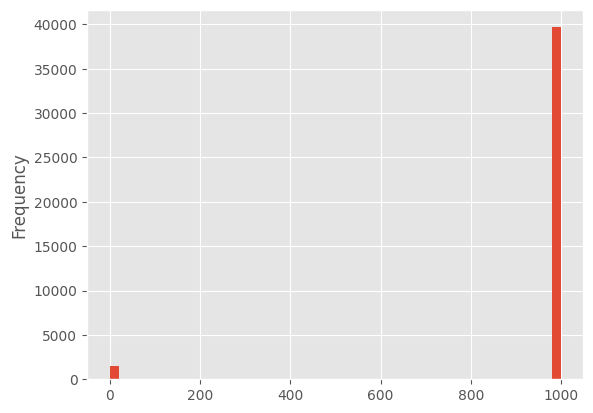

In [ ]:
# Inspect pdays
df['pdays'].plot(kind='hist',bins=50)
plt.show()

# df['pdays'].value_counts()

### Checklist for Data Transformation
Column values that require transformation
- job : 'admin.' needs to remove dot
- education : need to transform to more readabile format eg basic.4y -> basic 4y
- month : data only from Mar - Dec. Jan and Feb missing
- day_of_week : exclude saturday and sunday
- pdays is number of days that passed by after the client was last contacted from a previous campaign. but only has values either 0 / 999

Column names that require renaming
- emp.var.rate -> emp_var_rate
- cons.price.idx -> cons_price_idx
- cons.conf.idx -> cons_conf.idx
- euribor3m -> euribor_3m
- nr.employed -> n_employed
- y -> subscribed

## Data Transformation

### Replace 'admin.' with 'admin'

In [ ]:
df['job'] = df['job'].replace('admin.', 'admin')

### Replace '.' with ' '

In [ ]:
df['education'] = df['education'].str.replace('.', ' ',regex=False)

### Rename multiple columns at once

In [ ]:
df = df.rename(columns={
    'cons.price.idx': 'cons_price_idx',
    'cons.conf.idx': 'cons_conf_idx',
    'emp.var.rate': 'emp_var_rate',
    'nr.employed': 'n_employed',
    'y':'subscribed'
})

### Add a new column 'previously_contacted'

In [ ]:
df['previously_contacted'] =  np.where(df['pdays'] == 999, 'no', 'yes')

### Replace 9999 pdays with NaN as it will distort analysis

In [ ]:
df['pdays'] = df['pdays'].replace(999, np.nan)

### Re organize columns

In [ ]:
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','previously_contacted',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'n_employed', 'subscribed'
       ]]

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default               41188 non-null  object 
 5   housing               41188 non-null  object 
 6   loan                  41188 non-null  object 
 7   contact               41188 non-null  object 
 8   month                 41188 non-null  object 
 9   day_of_week           41188 non-null  object 
 10  duration              41188 non-null  int64  
 11  campaign              41188 non-null  int64  
 12  pdays                 1515 non-null   float64
 13  previously_contacted  41188 non-null  object 
 14  previous              41188 non-null  int64  
 15  poutcome           

Data is cleaned!

## Data Exploration

### Single Variate Analysis

In [ ]:
for col in df.select_dtypes('O').columns:
  print(df[col].value_counts(normalize=True).sort_values(ascending=False),"\n")

job
admin            0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: proportion, dtype: float64 

marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64 

education
university degree      0.295426
high school            0.231014
basic 9y               0.146766
professional course    0.127294
basic 4y               0.101389
basic 6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64 

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64 

housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64 

loan
no        

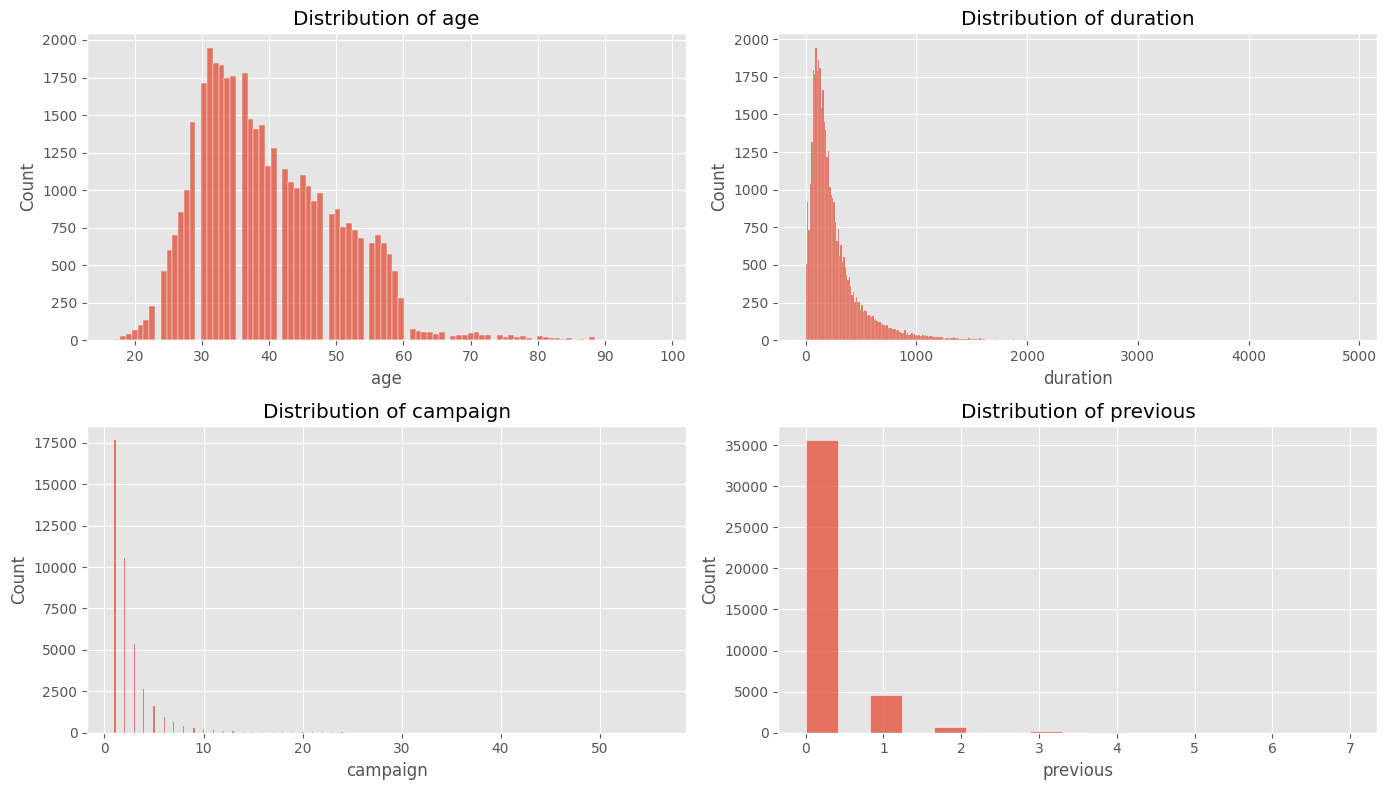

In [ ]:
# Checking distribution plot of each integer type column
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten()
cols = df.select_dtypes('int').columns

for i, col in enumerate(cols):
    sns.histplot(data=df,x=col,ax=ax[i])
    ax[i].set(xlabel=col,title=f'Distribution of {col}')

for j in range(i + 1, len(ax)):                    # to delete any empty plots
    fig.delaxes(ax[j])


plt.tight_layout()
plt.show()

## Bivariate Analysis

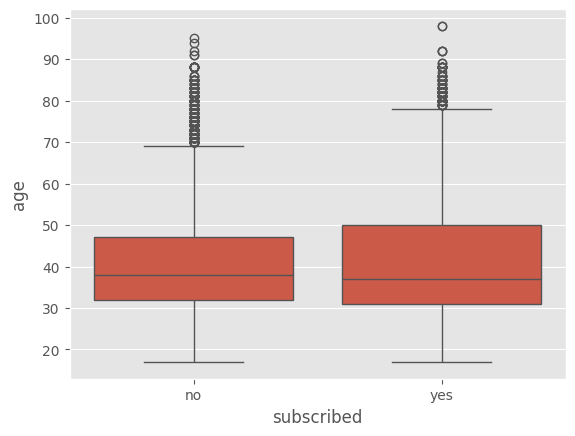

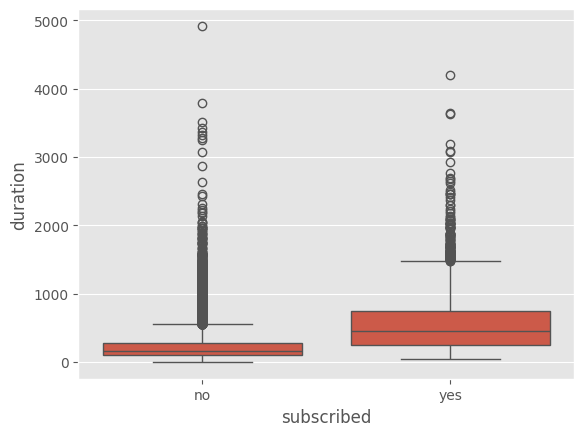

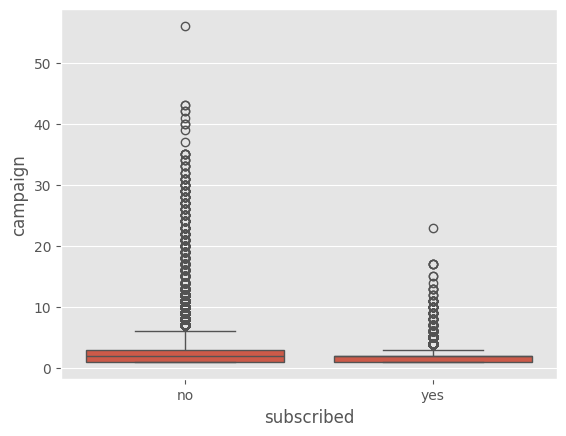

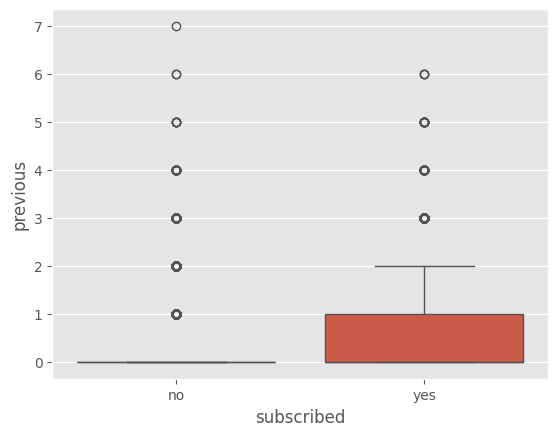

In [ ]:
for col in df.select_dtypes(include='int'):
  sns.boxplot(data=df, x='subscribed',y=col)
  plt.show()

### Multi-variate Analysis

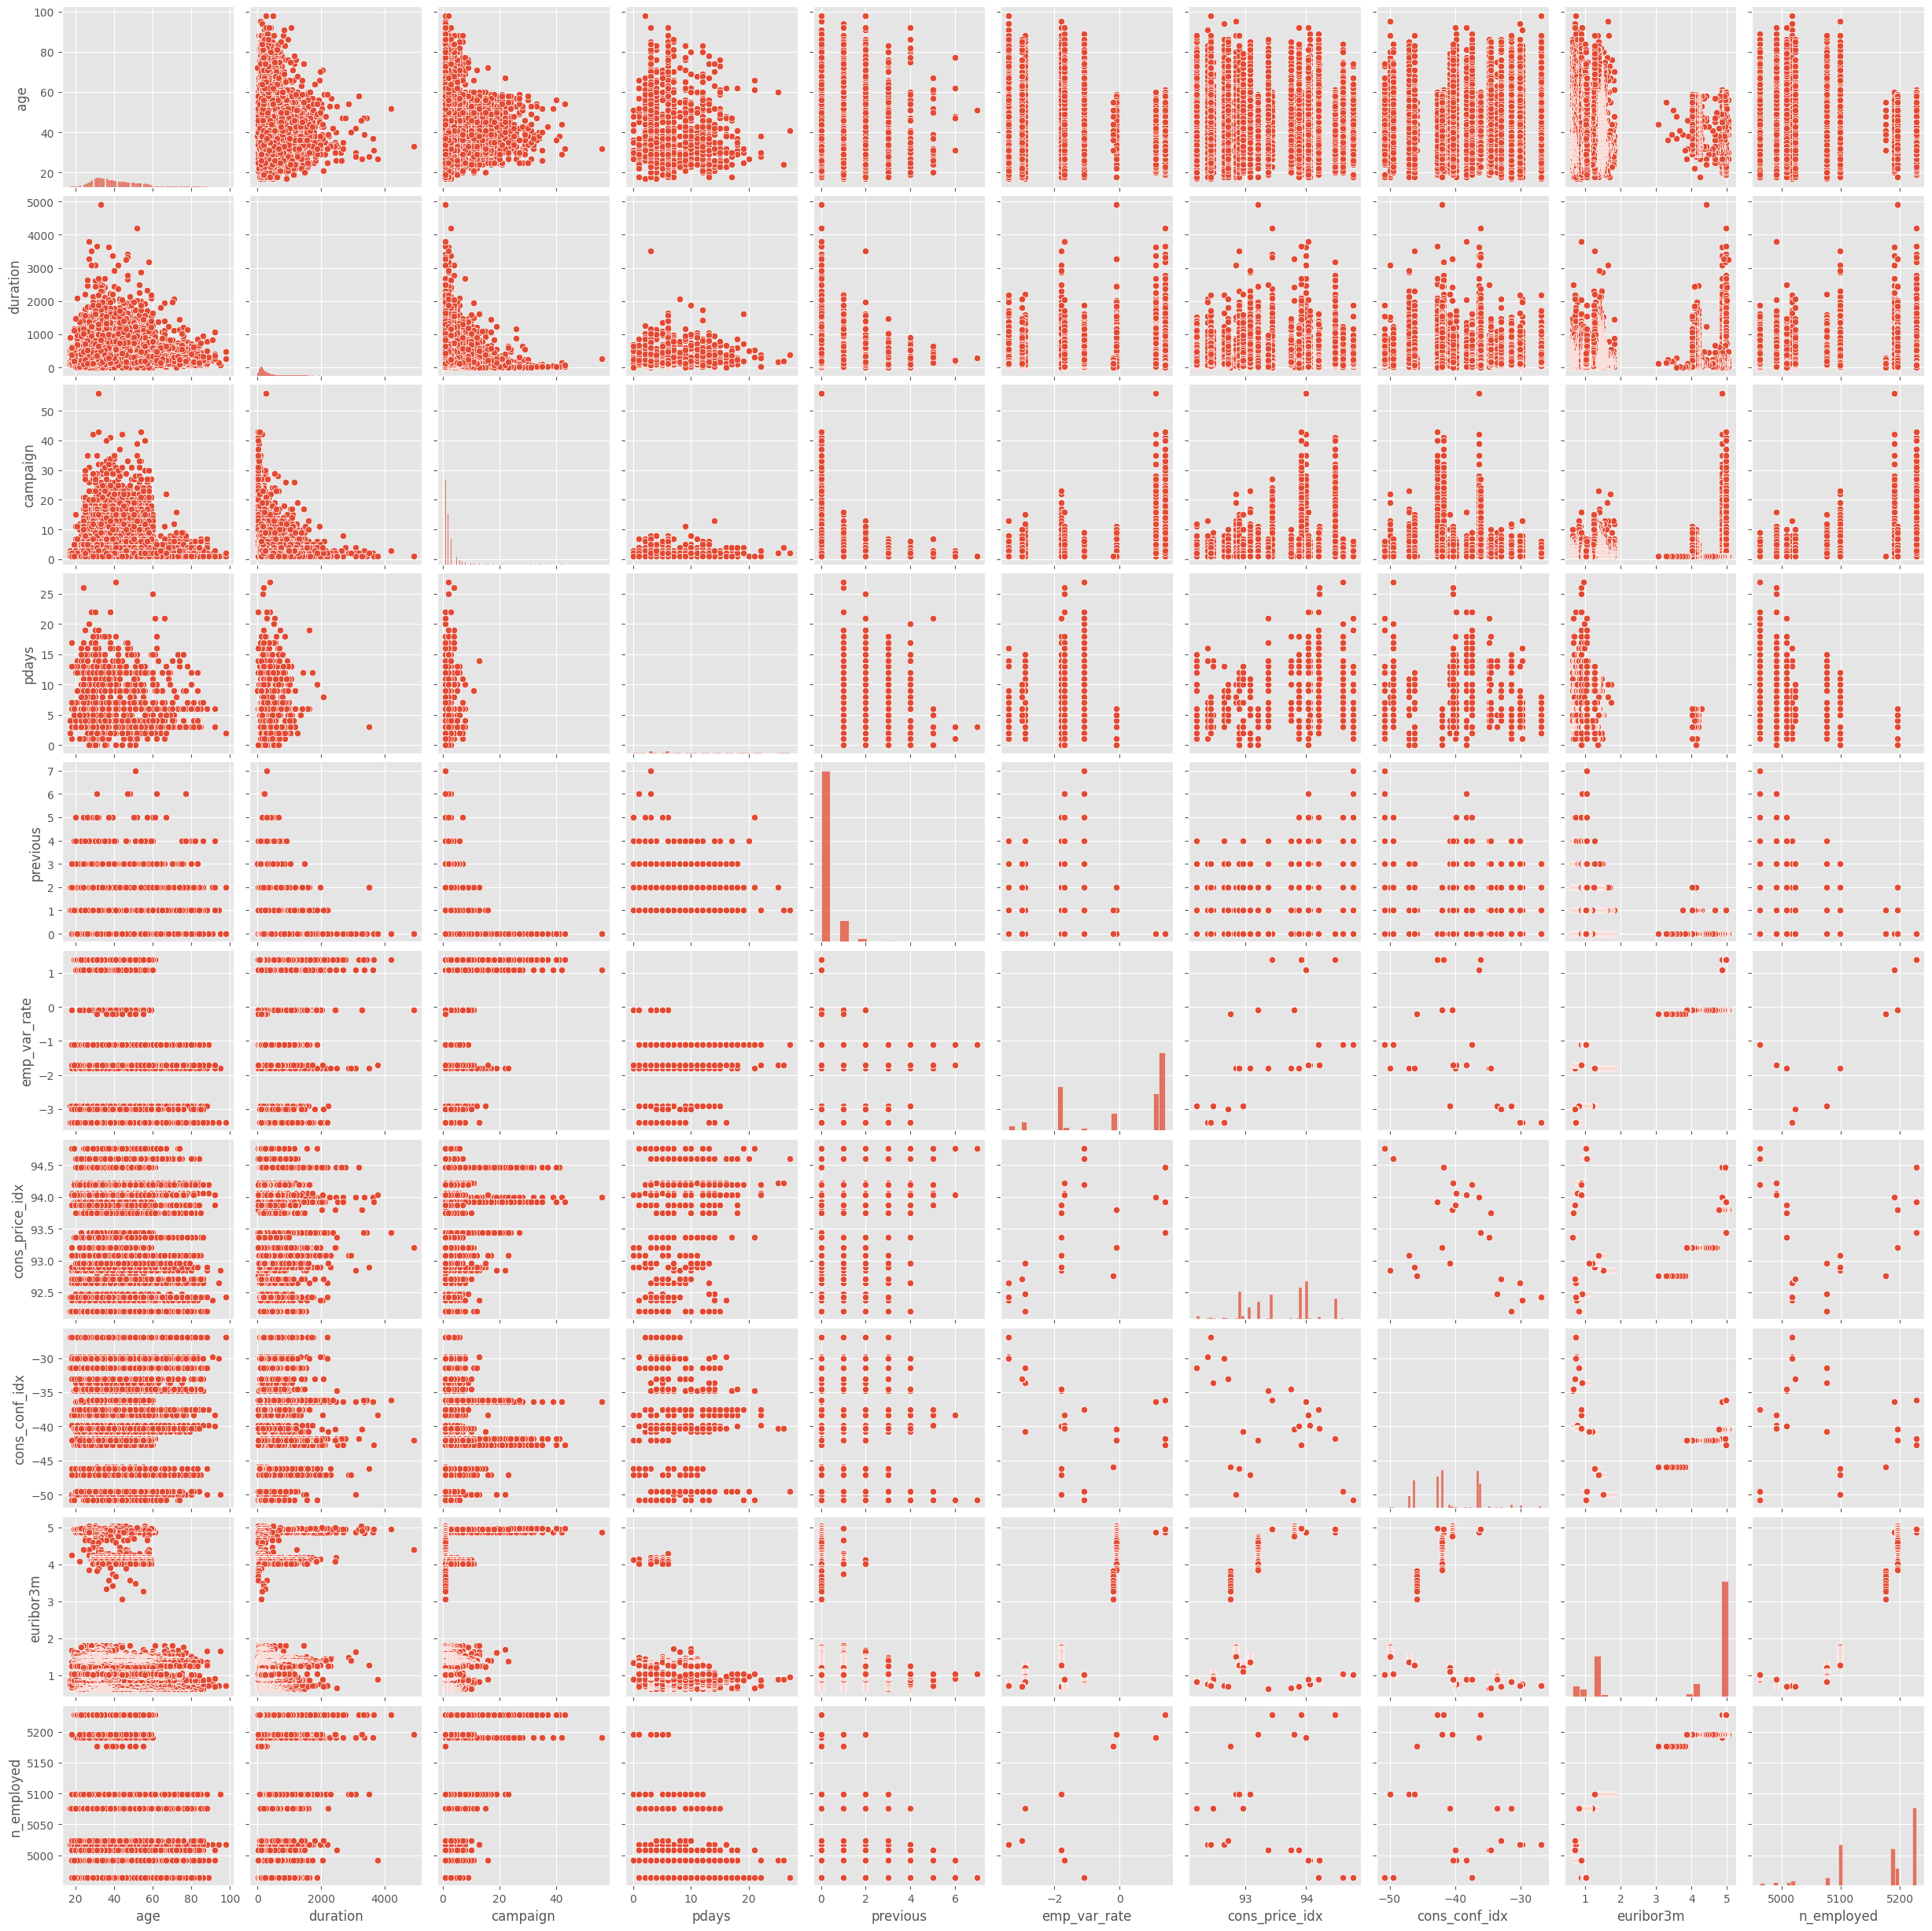

In [ ]:
sns.pairplot(df)
plt.show()

## Hypothesis Testing

In [ ]:
def hypothesis_summary(df, target='subscribed'):
    results = []

    for col in df.columns:
        if col == target:
            continue

        dtype = df[col].dtype
        method = None
        p_value = np.nan

        # Drop NA values for testing
        data = df[[col, target]].dropna()

        # Ensure target is binary (yes/no → 1/0)
        y = data[target].map({'yes': 1, 'no': 0}).astype(float)

        # --- Case 1: Categorical variable ---
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            contingency = pd.crosstab(data[col], y)
            if contingency.shape[0] > 1 and contingency.shape[1] > 1:
                chi2, p, _, _ = chi2_contingency(contingency)
                method = 'Chi-square test'
                p_value = p
            else:
                method = 'Chi-square test (skipped — single class)'

        # --- Case 2: Numerical variable ---
        elif np.issubdtype(df[col].dtype, np.number):
            group_yes = data.loc[y == 1, col]
            group_no = data.loc[y == 0, col]
            if len(group_yes) > 1 and len(group_no) > 1:
                stat, p = ttest_ind(group_yes, group_no, equal_var=False)
                method = 'T-test (independent samples)'
                p_value = p
            else:
                method = 'T-test (skipped — insufficient data)'

        # Determine significance
        significant = 'Yes' if pd.notna(p_value) and p_value < 0.05 else 'No'

        results.append({
            'column_name': col,
            'dtype': str(dtype),
            'hypothesis_test': method,
            'p_value': p_value,
            'significant': significant
        })

    # Convert to DataFrame
    summary_df = pd.DataFrame(results)
    return summary_df.sort_values('p_value', na_position='last').reset_index(drop=True)

In [ ]:
summary = hypothesis_summary(df, 'subscribed')
summary

,column_name,dtype,hypothesis_test,p_value,significant
0,previously_contacted,object,Chi-square test,0.000000e+00,Yes
1,poutcome,object,Chi-square test,0.000000e+00,Yes
2,duration,int64,T-test (independent samples),0.000000e+00,Yes
3,month,object,Chi-square test,0.000000e+00,Yes
4,euribor3m,float64,T-test (independent samples),0.000000e+00,Yes
5,n_employed,float64,T-test (independent samples),0.000000e+00,Yes
6,emp_var_rate,float64,T-test (independent samples),0.000000e+00,Yes
7,job,object,Chi-square test,4.189763e-199,Yes
8,contact,object,Chi-square test,1.525986e-189,Yes
9,previous,int64,T-test (independent samples),1.675951e-161,Yes


## Summary of Exploratory Data Analysis

-------------------------------

## Model Selection

📌 Target is categorical data and have binary output Yes/No, Logistic Regression & Decision Tree algorithm will be used <br>
<br>
Considering all assumptions in Logistic regression : <br>

**Linearity of the Logit**: Assumes that the log odds of the dependent variable are a linear combination of the independent variables.
Independence of Observations: Assumes that the observations are independent of each other. This means that the outcome of one observation does not influence another. <br>
**No Multicollinearity**: Assumes that the independent variables are not highly correlated with each other. Multicollinearity can affect the stability and interpretability of the regression coefficients.

In [ ]:
dfm = df.copy()

## Data Pre-processing for Machine Learning Model

In [ ]:
for col in dfm.columns:
  print(f'{col} null values:',dfm[col].isnull().sum())

age null values: 0
job null values: 0
marital null values: 0
education null values: 0
default null values: 0
housing null values: 0
loan null values: 0
contact null values: 0
month null values: 0
day_of_week null values: 0
duration null values: 0
campaign null values: 0
pdays null values: 39673
previously_contacted null values: 0
previous null values: 0
poutcome null values: 0
emp_var_rate null values: 0
cons_price_idx null values: 0
cons_conf_idx null values: 0
euribor3m null values: 0
n_employed null values: 0
subscribed null values: 0


In [ ]:
dfm = dfm[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
        #  'pdays',
         'previously_contacted',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'n_employed', 'subscribed'
       ]]

## Train and Test Split

In [ ]:
# Assigned Input and Output
x = dfm.iloc[:,:-1]
y = dfm.iloc[:,-1]

In [ ]:
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [ ]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

## Modelling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, make_scorer
)
import warnings
warnings.filterwarnings('ignore')

### Model Evaluation

In [ ]:
class ModelEvaluator:
    def __init__(self, x_train, x_test, y_train, y_test, cv_folds=5, random_state=42):
        """
        Enhanced Model Evaluator with hyperparameter tuning and cross-validation.

        Parameters:
        -----------
        x_train, x_test, y_train, y_test : array-like
            Training and testing data
        cv_folds : int, default=5
            Number of folds for cross-validation
        random_state : int, default=42
            Random state for reproducibility
        """
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.cv_folds = cv_folds
        self.random_state = random_state

        # Models with class_weight='balanced' by default
        self.models = {
            "Logistic Regression": LogisticRegression(
                random_state=random_state,
                max_iter=1000,
                class_weight='balanced'  # Handle imbalance
            ),
            "Decision Tree": DecisionTreeClassifier(
                random_state=random_state,
                class_weight='balanced'  # Handle imbalance
            ),
            "Random Forest": RandomForestClassifier(
                random_state=random_state,
                class_weight='balanced'  # Handle imbalance
            )
        }

        # Define hyperparameter grids
        # Lightweight grids optimized for local computation
        self.param_grids = {
            "Logistic Regression": {
                'C': [0.1, 1, 10],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']
            },
            "Decision Tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [5, 10],
                'criterion': ['gini', 'entropy']
            },
            "Random Forest": {
                'n_estimators': [50, 100],  # Reduced from [50, 100, 200]
                'max_depth': [5, 10],  # Reduced from [5, 10, 15, None]
                'min_samples_split': [5, 10],  # Reduced from [2, 5, 10]
                'max_features': ['sqrt']  # Reduced from ['sqrt', 'log2']
            }
        }

        # Alternative: More comprehensive grids for powerful machines
        self.param_grids_extended = {
            "Logistic Regression": {
                'C': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']
            },
            "Decision Tree": {
                'max_depth': [3, 5, 7, 10, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['gini', 'entropy']
            },
            "Random Forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2']
            }
        }

        self.results = []
        self.cv_results = []
        self.best_models = {}
        self.best_params = {}

    def fit_predict_evaluate(self, use_tuning=False, scoring='roc_auc',
                             use_extended_grids=False, use_randomized_search=False,
                             n_iter_random=20):
        """
        Fit models, predict, and evaluate with optional hyperparameter tuning.

        Parameters:
        -----------
        use_tuning : bool, default=False
            Whether to use hyperparameter tuning
        scoring : str, default='roc_auc'
            Scoring metric for hyperparameter tuning
        use_extended_grids : bool, default=False
            Use more comprehensive parameter grids (slower but more thorough)
        use_randomized_search : bool, default=False
            Use RandomizedSearchCV instead of GridSearchCV (faster for large grids)
        n_iter_random : int, default=20
            Number of iterations for RandomizedSearchCV

        Returns:
        --------
        pd.DataFrame : Summary of model performance
        """
        # Select which parameter grids to use
        param_grids = self.param_grids_extended if use_extended_grids else self.param_grids

        search_method = "Randomized Search" if use_randomized_search else "Grid Search"
        grid_type = "extended" if use_extended_grids else "lightweight"

        print(f"{'='*60}")
        if use_tuning:
            print(f"Training with {search_method} ({grid_type} grids)")
        else:
            print(f"Training without hyperparameter tuning")
        print(f"{'='*60}\n")

        for name, model in self.models.items():
            print(f"Training {name}...")

            if use_tuning and name in param_grids:
                if use_randomized_search:
                    # Use RandomizedSearchCV - faster, samples random combinations
                    search = RandomizedSearchCV(
                        estimator=model,
                        param_distributions=param_grids[name],
                        n_iter=n_iter_random,
                        cv=self.cv_folds,
                        scoring=scoring,
                        n_jobs=-1,
                        verbose=0,
                        random_state=self.random_state
                    )
                else:
                    # Use GridSearchCV - exhaustive search
                    search = GridSearchCV(
                        estimator=model,
                        param_grid=param_grids[name],
                        cv=self.cv_folds,
                        scoring=scoring,
                        n_jobs=-1,
                        verbose=0
                    )

                search.fit(self.x_train, self.y_train)
                best_model = search.best_estimator_
                self.best_params[name] = search.best_params_
                print(f"  Best params: {search.best_params_}")
                print(f"  Best CV score: {search.best_score_:.4f}")
            else:
                # Train with default parameters
                best_model = model
                best_model.fit(self.x_train, self.y_train)
                self.best_params[name] = "Default parameters"

            self.best_models[name] = best_model

            # Predict
            y_pred = best_model.predict(self.x_test)

            # Get probabilities for ROC-AUC
            if hasattr(best_model, "predict_proba"):
                y_prob = best_model.predict_proba(self.x_test)[:, 1]
            else:
                y_prob = y_pred

            # Evaluate on test set
            metrics = self._calculate_metrics(self.y_test, y_pred, y_prob)
            metrics['Model'] = name
            self.results.append(metrics)

            print(f"  Test ROC-AUC: {metrics['ROC-AUC']:.4f}\n")

        # Create summary DataFrame
        results_df = pd.DataFrame(self.results).sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

        # Reorder columns
        cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
        return results_df[cols]

    def cross_validate_models(self, scoring_metrics=None):
        """
        Perform k-fold cross-validation on all models.

        Parameters:
        -----------
        scoring_metrics : list, default=None
            List of scoring metrics. If None, uses default set.

        Returns:
        --------
        pd.DataFrame : Cross-validation results for all models
        """
        if scoring_metrics is None:
            scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        print(f"{'='*60}")
        print(f"Performing {self.cv_folds}-Fold Cross-Validation")
        print(f"{'='*60}\n")

        cv = StratifiedKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)

        for name, model in self.best_models.items() if self.best_models else self.models.items():
            print(f"Cross-validating {name}...")
            cv_result = {'Model': name}

            for metric in scoring_metrics:
                # Handle binary classification metrics
                if metric in ['precision', 'recall', 'f1']:
                    scorer = make_scorer(
                        eval(f"{metric}_score"),
                        pos_label=self._get_positive_label(),
                        zero_division=0
                    )
                else:
                    scorer = metric

                scores = cross_val_score(
                    model, self.x_train, self.y_train,
                    cv=cv, scoring=scorer, n_jobs=-1
                )

                cv_result[f'{metric.upper()}_mean'] = scores.mean()
                cv_result[f'{metric.upper()}_std'] = scores.std()
                print(f"  {metric.upper()}: {scores.mean():.4f} (+/- {scores.std():.4f})")

            self.cv_results.append(cv_result)
            print()

        return pd.DataFrame(self.cv_results)

    def show_classification_reports(self):
        """Display detailed classification reports for all models."""
        print(f"{'='*60}")
        print("CLASSIFICATION REPORTS")
        print(f"{'='*60}\n")

        models_to_use = self.best_models if self.best_models else self.models

        for name, model in models_to_use.items():
            y_pred = model.predict(self.x_test)
            print(f"{name}:")
            print("-" * 60)
            print(classification_report(self.y_test, y_pred))
            print()

    def show_confusion_matrices(self):
        """Display confusion matrices for all models."""
        print(f"{'='*60}")
        print("CONFUSION MATRICES")
        print(f"{'='*60}\n")

        models_to_use = self.best_models if self.best_models else self.models

        for name, model in models_to_use.items():
            y_pred = model.predict(self.x_test)
            cm = confusion_matrix(self.y_test, y_pred)
            print(f"{name}:")
            print("-" * 60)
            print(cm)
            print()

    def get_best_model(self, metric='ROC-AUC'):
        """
        Get the best performing model based on a specific metric.

        Parameters:
        -----------
        metric : str, default='ROC-AUC'
            Metric to use for selecting best model

        Returns:
        --------
        tuple : (model_name, model_object)
        """
        if not self.results:
            raise ValueError("No results available. Run fit_predict_evaluate() first.")

        results_df = pd.DataFrame(self.results)
        best_idx = results_df[metric].idxmax()
        best_name = results_df.loc[best_idx, 'Model']

        return best_name, self.best_models.get(best_name, self.models[best_name])

    def _calculate_metrics(self, y_true, y_pred, y_prob):
        """Helper method to calculate all metrics."""
        pos_label = self._get_positive_label()

        # Handle label encoding for ROC-AUC
        if y_true.dtype == 'object':
            y_true_encoded = y_true.map({self._get_negative_label(): 0, pos_label: 1})
        else:
            y_true_encoded = y_true

        return {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
            'Recall': recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
            'F1-score': f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
            'ROC-AUC': roc_auc_score(y_true_encoded, y_prob)
        }

    def _get_positive_label(self):
        """Detect positive label from training data."""
        unique_labels = self.y_train.unique()
        if 'yes' in unique_labels:
            return 'yes'
        elif 1 in unique_labels:
            return 1
        else:
            return unique_labels[1]

    def _get_negative_label(self):
        """Detect negative label from training data."""
        unique_labels = self.y_train.unique()
        if 'no' in unique_labels:
            return 'no'
        elif 0 in unique_labels:
            return 0
        else:
            return unique_labels[0]

In [ ]:
# Initialize evaluator
evaluator = ModelEvaluator(x_train, x_test, y_train, y_test, cv_folds=5)

In [ ]:
# Option 1: Quick evaluation without tuning
results = evaluator.fit_predict_evaluate(use_tuning=False)
print(results)

Training without hyperparameter tuning

Training Logistic Regression...
  Test ROC-AUC: 0.5000

Training Decision Tree...
  Test ROC-AUC: 0.4606

Training Random Forest...
  Test ROC-AUC: 0.6205

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0        Random Forest  0.277252   0.122786  0.881466  0.215547  0.620468
1  Logistic Regression  0.112649   0.112649  1.000000  0.202487  0.500000
2        Decision Tree  0.460063   0.097806  0.461207  0.161388  0.460562


In [ ]:
# Option 2: With lightweight hyperparameter tuning (RECOMMENDED for local machines)
results = evaluator.fit_predict_evaluate(use_tuning=True, scoring='roc_auc')
print(results)

Training with Grid Search (lightweight grids)

Training Logistic Regression...
  Best params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
  Best CV score: 0.9347
  Test ROC-AUC: 0.5000

Training Decision Tree...
  Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
  Best CV score: 0.9298
  Test ROC-AUC: 0.6162

Training Random Forest...
  Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
  Best CV score: 0.9406
  Test ROC-AUC: 0.5052

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0        Random Forest  0.277252   0.122786  0.881466  0.215547  0.620468
1        Decision Tree  0.441491   0.149188  0.841595  0.253448  0.616157
2        Random Forest  0.720199   0.124386  0.245690  0.165158  0.505247
3  Logistic Regression  0.112649   0.112649  1.000000  0.202487  0.500000
4  Logistic Regression  0.112649   0.112649  1.000000  0.202487  0.500000
5        Decision Tree  0.460063 

In [ ]:
# Option 3: Randomized search - faster for exploring large spaces
results = evaluator.fit_predict_evaluate(
    use_tuning=True,
    use_randomized_search=True,
    n_iter_random=20  # Try 20 random combinations
)
print(results)

In [ ]:
# Perform cross-validation
cv_results = evaluator.cross_validate_models()
print(cv_results)

Performing 5-Fold Cross-Validation

Cross-validating Logistic Regression...
  ACCURACY: 0.9114 (+/- 0.0022)
  PRECISION: 0.6688 (+/- 0.0235)
  RECALL: 0.4246 (+/- 0.0082)
  F1: 0.5191 (+/- 0.0065)
  ROC_AUC: 0.9348 (+/- 0.0019)

Cross-validating Decision Tree...
  ACCURACY: 0.9131 (+/- 0.0021)
  PRECISION: 0.6394 (+/- 0.0193)
  RECALL: 0.5277 (+/- 0.0411)
  F1: 0.5768 (+/- 0.0203)
  ROC_AUC: 0.9319 (+/- 0.0023)

Cross-validating Random Forest...
  ACCURACY: 0.9110 (+/- 0.0012)
  PRECISION: 0.7373 (+/- 0.0164)
  RECALL: 0.3265 (+/- 0.0182)
  F1: 0.4521 (+/- 0.0163)
  ROC_AUC: 0.9400 (+/- 0.0019)

                 Model  ACCURACY_mean  ACCURACY_std  PRECISION_mean  \
0  Logistic Regression       0.911381      0.002191        0.668808   
1        Decision Tree       0.913050      0.002061        0.639428   
2        Random Forest       0.910956      0.001165        0.737256   

   PRECISION_std  RECALL_mean  RECALL_std   F1_mean    F1_std  ROC_AUC_mean  \
0       0.023502     0.424572    

In [ ]:
# Show detailed reports
evaluator.show_classification_reports()
evaluator.show_confusion_matrices()

# Get best model
best_name, best_model = evaluator.get_best_model(metric='ROC-AUC')
print(f"Best model: {best_name}")

CLASSIFICATION REPORTS

Logistic Regression:
------------------------------------------------------------
              precision    recall  f1-score   support

          no       0.00      0.00      0.00      7310
         yes       0.11      1.00      0.20       928

    accuracy                           0.11      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.11      0.02      8238


Decision Tree:
------------------------------------------------------------
              precision    recall  f1-score   support

          no       0.95      0.39      0.55      7310
         yes       0.15      0.84      0.25       928

    accuracy                           0.44      8238
   macro avg       0.55      0.62      0.40      8238
weighted avg       0.86      0.44      0.52      8238


Random Forest:
------------------------------------------------------------
              precision    recall  f1-score   support

          no       0.89      0.